In [1]:
import pandas as pd
import numpy as np

## Data Exploration

### Users

In [2]:
users = pd.read_csv('data/lfm2b-1mon/original/users.tsv', sep='\t')
users

,user_id,country,age,gender,creation_time
0,2,UK,35,m,2002-10-29 01:00:00
1,6,AT,28,n,2003-07-23 02:00:00
2,14,UK,48,m,2003-02-18 21:44:13
3,15,US,28,m,2003-02-24 03:30:33
4,20,NaN,-1,n,2003-03-19 13:18:50
...,...,...,...,...,...
15253,119965,NaN,-1,n,2012-05-28 20:12:04
15254,120095,RU,20,f,2012-05-29 21:19:14
15255,120260,NaN,-1,n,2012-05-31 11:12:48
15256,120319,BY,19,f,2012-07-19 22:07:27


<Axes: >

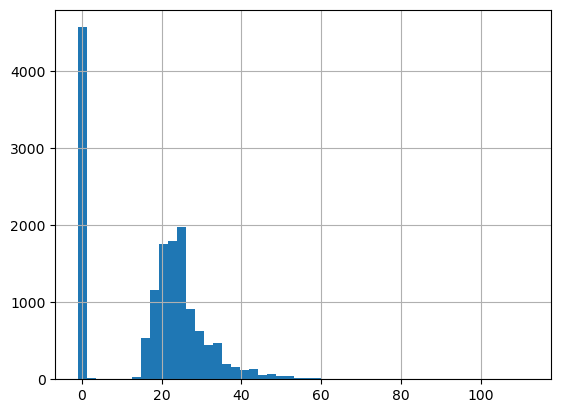

In [3]:
users.age.hist(bins=50)

<Axes: xlabel='country'>

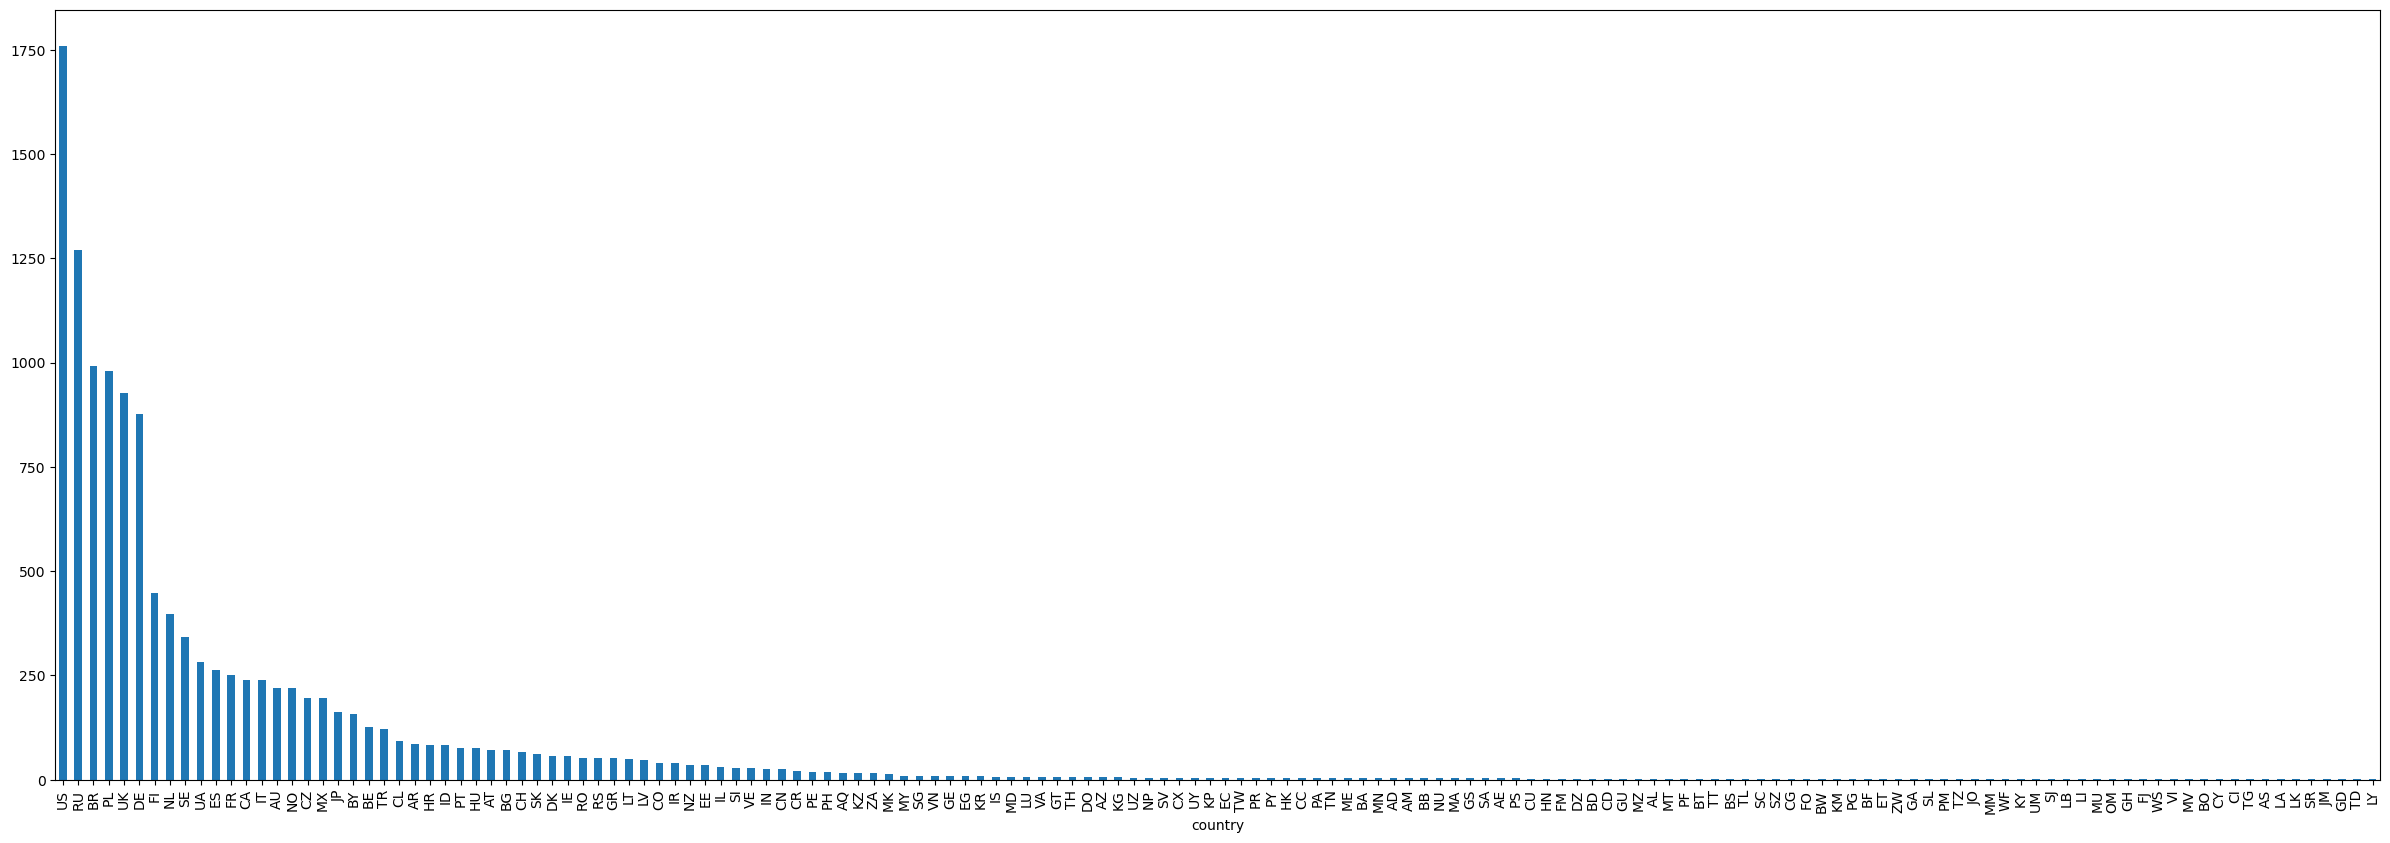

In [4]:
users['country'].value_counts().plot(kind='bar', figsize=(30, 10))

<Axes: xlabel='gender'>

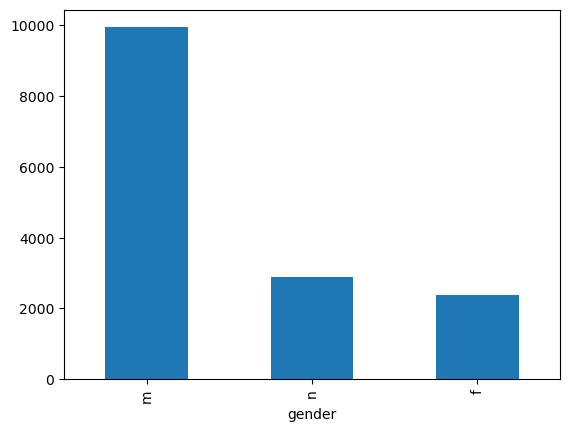

In [5]:
users['gender'].value_counts().plot(kind='bar')

<Axes: >

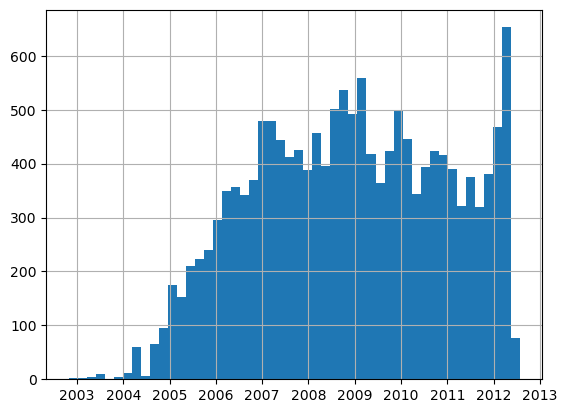

In [6]:
users.creation_time.astype('datetime64[ns]').hist(bins=50)

### Items

In [7]:
items = pd.read_csv('data/lfm2b-1mon/original/tracks.tsv', sep='\t')
items

,track_id,artist,track
0,138,Böhse Onkelz,!
1,155,Global Goon,!
2,159,Hellyeah,!
3,174,Kylie Minoise,!
4,193,Nogu Svelo!,!
...,...,...,...
4079416,50813348,Maxineczka,🤔 CHAT MAKEUP | Puder pod Oczy Paese + GARŚĆ N...
4079417,50813355,zpsanek,🤬 За шкирку и к стенке! Полицейский попался на...
4079418,50813364,JPEGMAFIA,🥺
4079419,50813367,Meditative Mind,🦋THE BUTTERFLY EFFECT ⁂ Elevate your Vibration...


<Axes: xlabel='artist'>

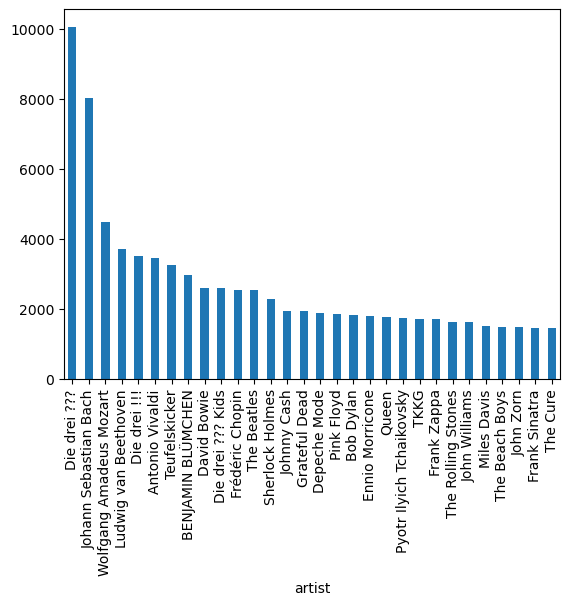

In [8]:
items.artist.value_counts()[:30].plot(kind='bar')

In [9]:
items[items.artist == "Die drei ???"]

,track_id,artist,track
15571,345416,Die drei ???,001 - und der Super-Papagei (Teil 01)
15572,345417,Die drei ???,001 - und der Super-Papagei (Teil 02)
15573,345418,Die drei ???,001 - und der Super-Papagei (Teil 03)
15574,345419,Die drei ???,001 - und der Super-Papagei (Teil 04)
15575,345420,Die drei ???,001 - und der Super-Papagei (Teil 05)
...,...,...,...
3881986,47711657,Die drei ???,und die Geisterinsel - Ein Fall für die drei F...
3881987,47711658,Die drei ???,und die Geisterinsel - Ein Fall für die drei F...
3881988,47711721,Die drei ???,und die Geisterinsel - Vorwarnung von Albert H...
3895336,48010400,Die drei ???,Überraschende Nachricht


<Axes: xlabel='track'>

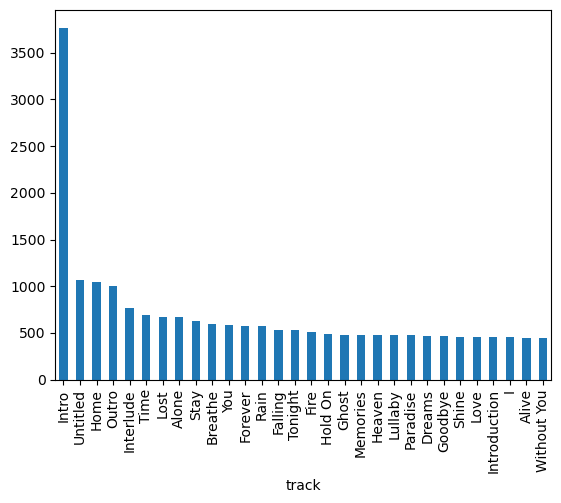

In [10]:
items.track.value_counts()[:30].plot(kind='bar')

### Interactions

In [11]:

inter = pd.read_csv('data/atomic/lfm2b-1mon/_old/lfm2b-1mon.inter', sep='\t')
inter

,user_id:token,item_id:token,timestamp:float,num_repeat:float
0,33738,10326542,13863140,2
1,33738,19393930,14954719,1
2,33738,37656104,14954719,1
3,33738,27830565,14954719,1
4,33738,28805096,14954719,1
...,...,...,...,...
14616787,57556,34492721,1094542,1
14616788,57556,17819946,9130502,1
14616789,57556,24427334,18190341,1
14616790,57556,12482341,21177422,1


In [12]:
display(inter.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

,user_id:token,item_id:token,timestamp:float,num_repeat:float
count,14616792.00,14616792.00,14616792.00,14616792.00
mean,31892.95,25355510.49,13177980.11,2.08
std,27393.41,13429786.76,6208780.31,18.50
min,2.00,138.00,65.00,1.00
25%,9948.00,13847831.00,8048959.00,1.00
50%,24270.00,25287946.50,13239602.00,1.00
75%,48298.00,37112986.00,18570972.00,2.00
max,120321.00,50813369.00,24237304.00,51707.00


<Axes: >

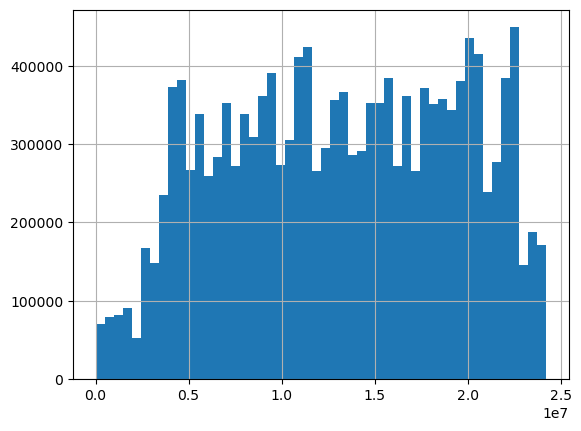

In [13]:
#pd.to_datetime(inter['timestamp:float'], unit='m').hist(bins=50)
inter['timestamp:float'].hist(bins=50)

<Axes: >

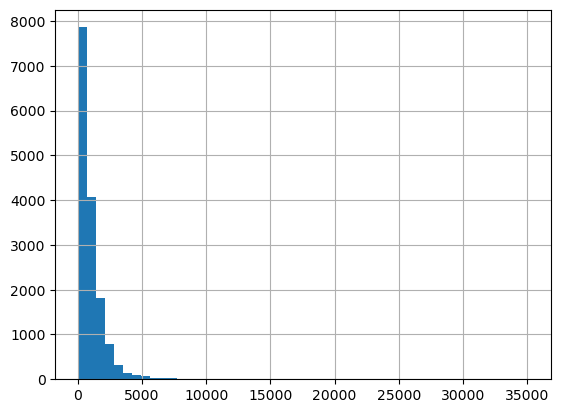

In [14]:
inter['user_id:token'].value_counts().hist(bins=50)

In [15]:
top20_items = pd.DataFrame(inter['item_id:token']).value_counts()[:20]
top20_items = top20_items.reset_index().rename(columns={0:'count'})
top20_tracks = pd.merge(top20_items, items[['track_id', 'artist', 'track']], how='left', left_on=['item_id:token'], right_on=['track_id'])
top20_tracks

,item_id:token,count,track_id,artist,track
0,46443480,2159,46443480,Billie Eilish,bad guy
1,7140982,1547,7140982,The Weeknd,Blinding Lights
2,24741463,1520,24741463,Tame Impala,Lost In Yesterday
3,10882127,1390,10882127,Tones and I,Dance Monkey
4,7499533,1371,7499533,Tame Impala,Borderline
5,12490328,1324,12490328,Dua Lipa,Don't Start Now
6,7744571,1296,7744571,Tame Impala,Breathe Deeper
7,46731074,1271,46731074,Billie Eilish,everything i wanted
8,29654115,1215,29654115,Tame Impala,One More Year
9,31579245,1192,31579245,Tame Impala,Posthumous Forgiveness


## Data Preprocessing

### Users

user_id:token
28533     35106
9156      15576
36911     15507
17292     15503
10636     14672
          ...  
86273         1
34679         1
18837         1
9133          1
112748        1
Name: count, Length: 15258, dtype: int64

<Axes: >

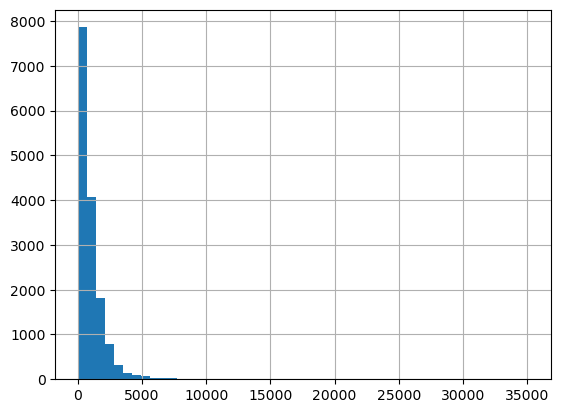

In [16]:
display(inter['user_id:token'].value_counts())
inter['user_id:token'].value_counts().hist(bins=50)


In [17]:
print(f"Unique users before cleansing: {len(inter['user_id:token'].unique())}")
print(f"Unique tracks before cleansing: {len(inter['item_id:token'].unique())}")

Unique users before cleansing: 15258
Unique tracks before cleansing: 4082530


,user_id:token,item_id:token,timestamp:float,num_repeat:float
0,33738,10326542,13863140,2
1,33738,19393930,14954719,1
2,33738,37656104,14954719,1
3,33738,27830565,14954719,1
4,33738,28805096,14954719,1
...,...,...,...,...
14616787,57556,34492721,1094542,1
14616788,57556,17819946,9130502,1
14616789,57556,24427334,18190341,1
14616790,57556,12482341,21177422,1


<Axes: >

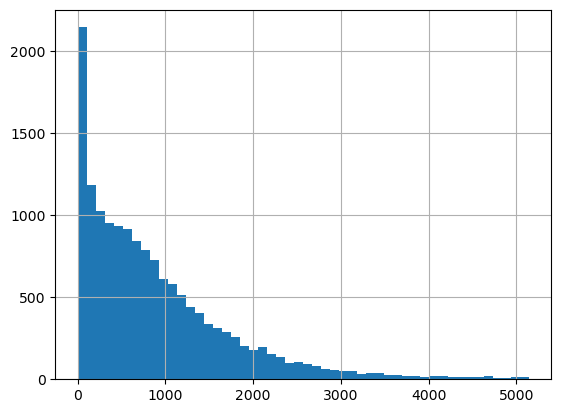

In [18]:
# Remove power users below the 99th percentile
user_counts = inter['user_id:token'].value_counts()
perc_99 = np.percentile(user_counts, 99)
user_below = set(user_counts[user_counts <= perc_99].index)
inter = inter[inter['user_id:token'].isin(user_below)]

display(inter)

inter['user_id:token'].value_counts().hist(bins=50)

,user_id:token,item_id:token,timestamp:float,num_repeat:float
0,33738,10326542,13863140,2
1,33738,19393930,14954719,1
2,33738,37656104,14954719,1
3,33738,27830565,14954719,1
4,33738,28805096,14954719,1
...,...,...,...,...
14615383,4805,31622030,9541294,1
14615384,4805,21032593,9541294,1
14615385,4805,40486911,9541294,1
14615386,4805,23907254,9541294,1


<Axes: >

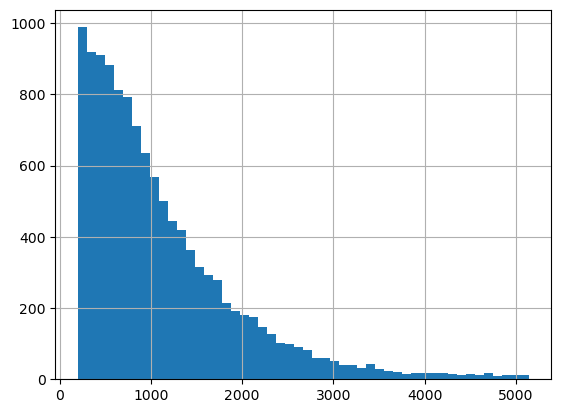

In [19]:
# Just keep users that listened to at least 100 tracks
user_counts = inter['user_id:token'].value_counts()
user_above = set(user_counts[user_counts >=100].index)
inter = inter[inter['user_id:token'].isin(user_above)]
display(inter)
inter['user_id:token'].value_counts().hist(bins=50)

### Items

item_id:token
46443480    2020
24741463    1474
7140982     1444
7499533     1325
10882127    1283
            ... 
25315494       1
2446952        1
8876451        1
13573333       1
19748278       1
Name: count, Length: 3623297, dtype: int64

<Axes: >

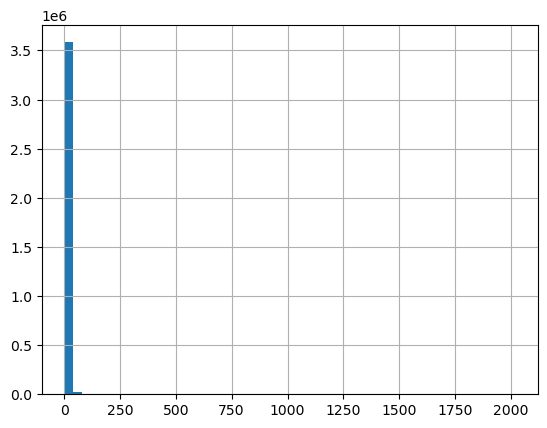

In [20]:
display(inter['item_id:token'].value_counts())
inter['item_id:token'].value_counts().hist(bins=50)

,user_id:token,item_id:token,timestamp:float,num_repeat:float
33,33738,4314605,16301373,3
50,33738,14617173,23083497,1
91,33738,20555709,11428735,1
161,33738,6071766,6677466,1
183,33738,35554452,17792911,1
...,...,...,...,...
14614303,11516,15196625,11247366,1
14614308,11516,44907654,9362729,1
14614311,11516,32800819,9652804,1
14615215,4805,44208348,16660710,1


<Axes: >

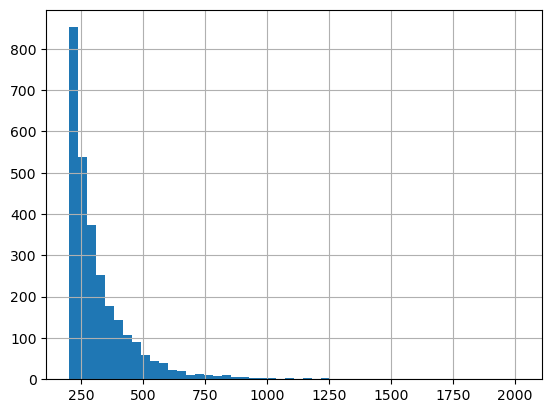

In [21]:
# Just keep tracks that were listened to by at least 100 different users
item_counts = inter['item_id:token'].value_counts()
item_above = set(item_counts[item_counts >= 100].index)
inter = inter[inter['item_id:token'].isin(item_above)]
display(inter)
inter['item_id:token'].value_counts().hist(bins=50)

In [22]:
print(f"Unique users after cleansing: {len(inter['user_id:token'].unique())}")
print(f"Unique tracks after cleansing: {len(inter['item_id:token'].unique())}")

Unique users after cleansing: 11643
Unique tracks after cleansing: 2805


In [23]:
inter.to_csv('data/atomic/lfm2b-1mon/lfm2b-1mon.inter', index=False, sep='\t')

In [1]:
import yaml

def generate_requirements_txt(yaml_file, requirements_file):
    with open(yaml_file, 'r') as f:
        env = yaml.safe_load(f)

    # Extract only the necessary dependencies
    dependencies = env.get('dependencies', [])
    pip_deps = []
    conda_deps = []

    for dep in dependencies:
        if isinstance(dep, str):
            conda_deps.append(dep)
        elif isinstance(dep, dict) and 'pip' in dep:
            pip_deps.extend(dep['pip'])

    # Write the requirements.txt file
    with open(requirements_file, 'w') as f:
        for dep in conda_deps:
            f.write(f"{dep}\n")
        for dep in pip_deps:
            f.write(f"{dep}\n")

generate_requirements_txt('environment.yml', 'requirements.txt')
